In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/DATA_TRAIN/TRAIN_DATA/data-tien-giay/train',
                                                 shuffle=True,
                                                 target_size=(250, 300), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/DATA_TRAIN/TRAIN_DATA/data-tien-giay/validation',
                                                 shuffle=True,
                                                 target_size=(250, 300), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 165 images belonging to 11 classes.
Found 0 images belonging to 11 classes.


In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(250,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(loss='mse', optimizer=opt,metrics=['accuracy'],run_eagerly=True)

In [6]:
history=model.fit(train_dataset,batch_size=15,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
11/11 [==============================] - 56s 5s/step - loss: 0.1052 - accuracy: 0.0909
Epoch 2/20
11/11 [==============================] - 43s 4s/step - loss: 0.1062 - accuracy: 0.0909
Epoch 3/20
11/11 [==============================] - 43s 4s/step - loss: 0.1047 - accuracy: 0.1152
Epoch 4/20
11/11 [==============================] - 42s 4s/step - loss: 0.0965 - accuracy: 0.1758
Epoch 5/20
11/11 [==============================] - 42s 4s/step - loss: 0.0944 - accuracy: 0.2000
Epoch 6/20
11/11 [==============================] - 42s 4s/step - loss: 0.0859 - accuracy: 0.2788
Epoch 7/20
11/11 [==============================] - 42s 4s/step - loss: 0.0841 - accuracy: 0.3091
Epoch 8/20
11/11 [==============================] - 42s 4s/step - loss: 0.0808 - accuracy: 0.3030
Epoch 9/20
11/11 [==============================] - 42s 4s/step - loss: 0.0778 - accuracy: 0.3576
Epoch 10/20
11/11 [==============================] - 43s 4s/step - loss: 0.0777 - accuracy: 0.3636
Epoch 11/20
11/11 [

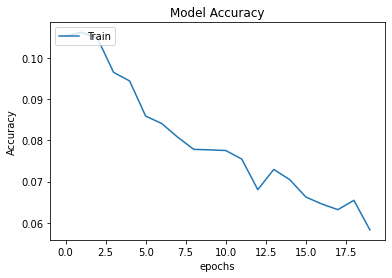

In [7]:
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [8]:
train_dataset.class_indices

{'100': 0,
 '100k': 1,
 '10k': 2,
 '1k': 3,
 '200': 4,
 '200k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

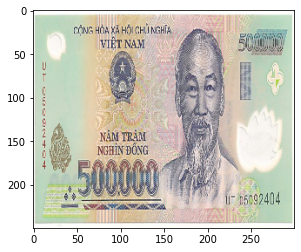

Day la 500K VND


In [17]:

filename = '500k.jpg'
img = load_img(filename,target_size = (250,300))
imgplot = plt.imshow(img)
plt.show()
img = img_to_array(img)
img =  img.reshape(1,250,300,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)


if kq==0:
  print('Day la 100 VND')
elif kq ==1:
  print('Day la 100K VND')
elif kq ==2:
  print('Day la 10K VND')
elif kq ==3:
  print('Day la 1K VND')  
elif kq ==4:
  print('Day la 200 VND')
elif kq ==5:
  print('Day la 200K VND')  
elif kq ==6:
  print('Day la 2K VND')
elif kq ==7:
  print('Day la 500k VND')
elif kq ==8:
  print('Day la 500K VND')
elif kq ==9:
  print('Day la 50K VND')
elif kq ==10:
  print('Day la 5k VND')  
